In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.7 MB/s eta 0:00:00


In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split




In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import classification_report
from keras.utils import pad_sequences
from sklearn.neural_network import MLPRegressor
from keras.preprocessing.text import Tokenizer
from keras.layers import Activation, Dropout, Dense,Embedding,SpatialDropout1D,LSTM

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_excel('Asian Airlines Reviews.xlsx')

In [ ]:
data.head(10)

,airline_name,link,author,author_country,date,content,cabin_flown,seat_comfort_rating,overall_rating,inflight_entertainment_rating,food_beverages_rating,recommended
0,airasia,/airline-reviews/airasia,Sotheareach Sok,Cambodia,2015-07-22,The flight was very pleasant. I enjoyed it but...,Economy,3.0,8.0,1.0,1.0,1.0
1,airasia,/airline-reviews/airasia,Thomas Jellis,United Kingdom,2015-07-22,I flew to Kuala Lumpur and back and hated both...,Economy,1.0,3.0,NaN,NaN,0.0
2,airasia,/airline-reviews/airasia,Zhivko Kulev,Bulgaria,2015-07-21,June 2015 I went on a small trip around Asia a...,Economy,5.0,10.0,5.0,4.0,1.0
3,airasia,/airline-reviews/airasia,S Altham,Australia,2015-06-28,This was our first AirAsia trip from Perth to ...,Economy,3.0,8.0,NaN,NaN,1.0
4,airasia,/airline-reviews/airasia,Peter Tong,Indonesia,2015-06-22,Flew AirAsia from Jakarta to Bali and overall ...,Economy,4.0,8.0,NaN,NaN,1.0
5,airasia,/airline-reviews/airasia,Nitin Aggarwal,India,2015-06-04,Air Asia India: Traveled from Delhi to Bangalo...,Economy,1.0,1.0,1.0,1.0,0.0
6,airasia,/airline-reviews/airasia,C Memoli,United States,2015-05-05,Flew Bangkok to Bali then Bali to Singapore. P...,Economy,4.0,9.0,2.0,4.0,1.0
7,airasia,/airline-reviews/airasia,N Preeti,India,2015-05-04,Round-trip from Goa to Bangalore on 29 April 2...,Economy,4.0,8.0,1.0,3.0,1.0
8,airasia,/airline-reviews/airasia,Ranganathan Manikandan,India,2015-04-10,TRZ-KUL-DPS-JOG and CGK-KUL-MAA. Travelled in ...,Economy,4.0,7.0,1.0,1.0,1.0
9,airasia,/airline-reviews/airasia,N Schöbel,Germany,2015-04-08,Flew recently from Denpasar to Kuala Lumpur. F...,Economy,1.0,1.0,1.0,1.0,0.0


In [ ]:
data['content'] = data['content'].replace('wi\\-fi','wifi', regex=True)
data['content'] = data['content'].replace('flights','flight', regex=True)
data['content'] = data['content'].replace('airlines','airline', regex=True)
data['content'] = data['content'].replace('kong','hongkong', regex=True)
data['content'] = data['content'].replace('hours','hour', regex=True)
data['content'] = data['content'].replace('seats','seat', regex=True)
data['content'] = data['content'].replace('meals','meal', regex=True)
data['content'] = data['content'].replace('ife','life', regex=True)

In [ ]:
data['content'][0]

'The flight was very pleasant. I enjoyed it but AirAsia should consider add the in-flight entertainment packages to the flight.'

In [ ]:
data['content'][4969]

"Never heard of this airline until I flew in July on Embraer 190 from Tianjin to Ningbo but impressed by service standards. At the airport the check in and boarding was quick and efficient and FA's were very attentive. Okay their English language skills need improving but never seen such an efficient and smiling set of FA's. Seats comfortable for this quite short trip meal was also good - lack of newspapers though. Will fly them again in September and woulkd have no doubts about recommending them to others as a must-try airline."

In [ ]:
#print missing values
print("missing value")
print(data.isna().sum())

missing value
airline_name                       0
link                               0
author                             0
author_country                   128
date                               0
content                            0
cabin_flown                      220
seat_comfort_rating              733
overall_rating                   279
inflight_entertainment_rating    758
food_beverages_rating            741
recommended                        2
dtype: int64


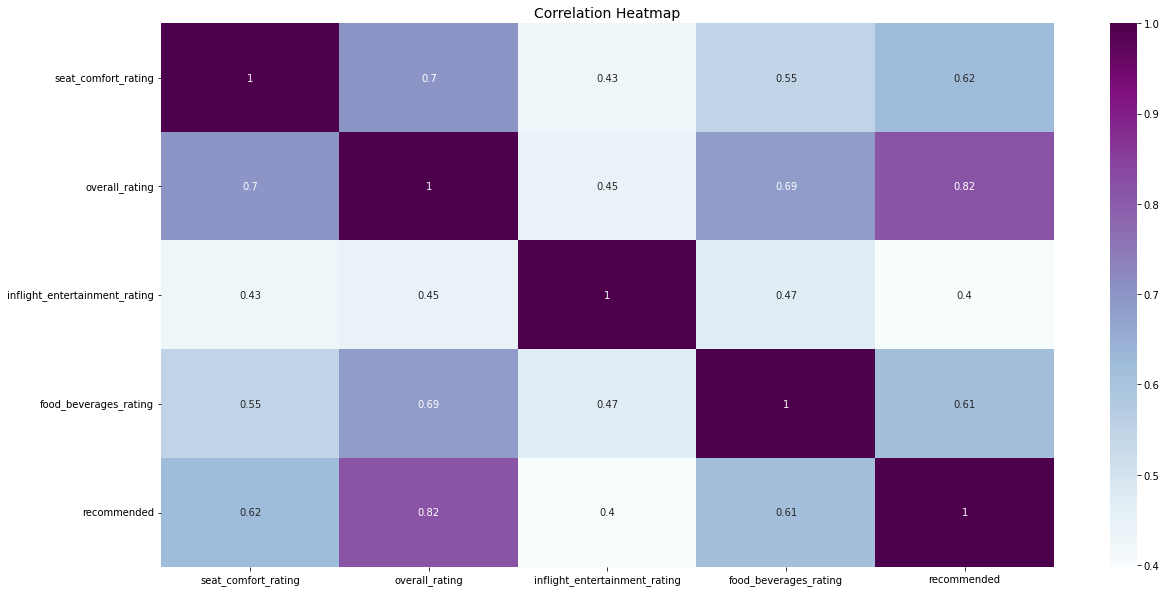

In [ ]:
# maping data correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

**Create Wordcloud**

In [ ]:
stop = stopwords.words('english')

In [ ]:
moddata = data['content'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [ ]:
#print 100 most frequent data
Freqdata = Counter(" ".join(moddata).split()).most_common(100)

In [ ]:
Freqdata

[('i', 8281),
 ('flight', 7494),
 ('the', 5002),
 ('seat', 3579),
 ('food', 2991),
 ('service', 2713),
 ('good', 2615),
 ('-', 2182),
 ('staff', 1881),
 ('crew', 1811),
 ('cabin', 1701),
 ('hour', 1675),
 ('time', 1645),
 ('airline', 1549),
 ('would', 1510),
 ('business', 1492),
 ('meal', 1485),
 ('class', 1469),
 ('flight.', 1359),
 ('air', 1263),
 ('entertainment', 1245),
 ('one', 1204),
 ('return', 1155),
 ('flew', 1080),
 ('we', 1031),
 ('first', 1012),
 ('comfortable', 990),
 ('plane', 986),
 ('great', 961),
 ('new', 952),
 ('economy', 950),
 ('fly', 919),
 ('get', 897),
 ('back', 855),
 ('served', 842),
 ('leg', 841),
 ('excellent', 824),
 ('even', 816),
 ('passengers', 813),
 ('friendly', 790),
 ('aircraft', 778),
 ('could', 774),
 ('china', 763),
 ('us', 754),
 ('airport', 743),
 ('2', 700),
 ('check', 692),
 ('much', 685),
 ('long', 681),
 ('lounge', 675),
 ('inflight', 673),
 ('also', 667),
 ('old', 666),
 ('drinks', 653),
 ('overall', 636),
 ('singapore', 632),
 ('experience

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# create wordcloud of 100 most frequent data
text = data['content'].values
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                max_words=100,
                stopwords = stopwords,
                min_font_size = 10).generate(str(text))


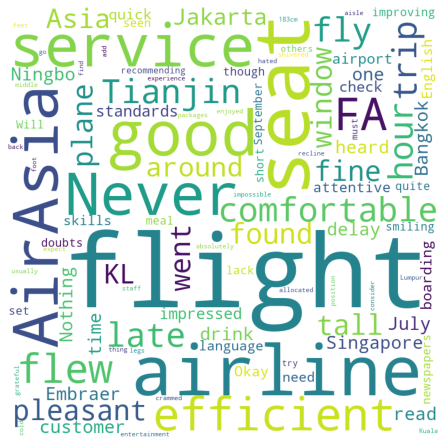

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Topic Modeling**

In [ ]:
#parems can be both in Integer or float format.
#except for stopwords which are excluded , other words can only be appeared in min of 2 documents and max of 95% of documents.
#throws out random words , misspellings and also very common words.
cv = CountVectorizer(max_df=0.95,min_df=2,stop_words='english')


In [ ]:
dtm = cv.fit_transform(data['content'])

In [ ]:
dtm

<4970x7281 sparse matrix of type '<class 'numpy.int64'>'
	with 226638 stored elements in Compressed Sparse Row format>

In [ ]:
LDA = LatentDirichletAllocation(n_components=6,random_state=42)

In [ ]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=6, random_state=42)

In [ ]:
len(cv.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7281

In [ ]:
random_word_id = random.randint(0,7281)

In [ ]:
cv.get_feature_names()[random_word_id]

'wound'

In [ ]:
#Number of topics
len(LDA.components_)

6

In [ ]:
LDA.components_.shape

(6, 7281)

In [ ]:
LDA.components_
# probabilty of each of the words belonging to each topic.

array([[ 0.16853293,  0.16666701,  0.16691419, ...,  0.16666696,
         0.16666686,  0.16666701],
       [ 0.16716801,  0.16666718,  2.16612416, ...,  2.16392488,
         6.88644843,  2.16685047],
       [ 0.166868  ,  0.17275239,  0.16666681, ...,  0.16666692,
         9.44530238,  0.16787446],
       [ 0.16718159,  3.1583285 ,  0.16696117, ...,  0.16678968,
         0.16778169, 14.1640409 ],
       [32.70946936,  0.16801871,  0.16666677, ...,  0.1679161 ,
         0.16703901,  0.16757491],
       [ 2.62078012,  0.1675662 ,  0.1666669 , ...,  0.16803547,
         0.16676164,  0.16699225]])

In [ ]:
single_topic =  LDA.components_[2]

In [ ]:
single_topic.argsort() # words indexs of least probable words to most probable words

array([6914, 4284,  403, ..., 2808, 2768, 5722])

In [ ]:
#Argsort returns index positions from Least to greatest. What we want is top 10 values.
#thus we return the index positions of 10 of the most probable words
single_topic.argsort()[-10:]

array([3840, 5924, 4120, 4523, 1851, 1247, 5788, 2808, 2768, 5722])

In [ ]:
top_twenty_words = single_topic.argsort()[-20:]
for index in top_twenty_words:
    print(cv.get_feature_names()[index])

poor
business
asked
hour
entertainment
economy
airline
class
plane
did
leg
sin
meal
old
crew
cabin
service
food
flight
seat


In [ ]:
for i, topic in enumerate(LDA.components_):
    print(f"The top 20 words #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-20:]])
    print('\n')

The top 20 words #0
['lumpur', 'kuala', 'entertainment', 'air', 'served', 'friendly', 'aircraft', 'return', 'plane', 'meal', 'cabin', 'seat', 'service', 'airline', 'crew', 'good', 'food', 'time', 'kul', 'flight']


The top 20 words #1
['kul', 'tg', 'time', 'return', 'lounge', 'premium', 'business', 'economy', 'crew', 'good', 'class', 'cabin', 'kl', 'service', 'meal', 'flight', 'food', 'thai', 'seat', 'bkk']


The top 20 words #2
['poor', 'business', 'asked', 'hour', 'entertainment', 'economy', 'airline', 'class', 'plane', 'did', 'leg', 'sin', 'meal', 'old', 'crew', 'cabin', 'service', 'food', 'flight', 'seat']


The top 20 words #3
['return', 'icn', 'meal', 'airline', 'time', 'economy', 'great', 'staff', 'entertainment', 'cabin', 'crew', 'excellent', 'comfortable', 'business', 'seat', 'class', 'service', 'food', 'good', 'flight']


The top 20 words #4
['minutes', 'arrived', 'did', 'return', 'told', 'beijing', 'late', 'boarding', 'plane', 'china', 'passengers', 'airline', 'delayed', 'ai

**Topic** **0** -> **Entertainment** 

**Topic** **1** -> **Seat** **class**

 **Topic** **2** -> **In**-**flight** **meal**

 **Topic** **3** -> **Seat** **Comfort**

**Topic** **4** -> **China** **Airlines** (**similar** **to** **Singapore** **Airlines** **in** **the** **paper**)

**Topic** **5** -> **Staff** **services**



In [ ]:
topic_results = LDA.transform(dtm)

In [ ]:
topic_results.shape

(4970, 6)

In [ ]:
topic_results[0]
#probability of each of the comments (documents) belonging to each of the topics.

array([0.51701374, 0.01525493, 0.01524001, 0.42193379, 0.01526508,
       0.01529244])

In [ ]:
topic_results[0].round(2)

array([0.52, 0.02, 0.02, 0.42, 0.02, 0.02])

In [ ]:
topic_results[0].argmax()
# returns the index position of the highest probability for each of the documents

0

In [ ]:
data['topic'] = topic_results.argmax(axis = 1)

In [ ]:
data.head(10)

,airline_name,link,author,author_country,date,content,cabin_flown,seat_comfort_rating,overall_rating,inflight_entertainment_rating,food_beverages_rating,recommended,topic
0,airasia,/airline-reviews/airasia,Sotheareach Sok,Cambodia,2015-07-22,The flight was very pleasant. I enjoyed it but...,Economy,3.0,8.0,1.0,1.0,1.0,0
1,airasia,/airline-reviews/airasia,Thomas Jellis,United Kingdom,2015-07-22,I flew to Kuala Lumpur and back and hated both...,Economy,1.0,3.0,NaN,NaN,0.0,2
2,airasia,/airline-reviews/airasia,Zhivko Kulev,Bulgaria,2015-07-21,June 2015 I went on a small trip around Asia a...,Economy,5.0,10.0,5.0,4.0,1.0,4
3,airasia,/airline-reviews/airasia,S Altham,Australia,2015-06-28,This was our first AirAsia trip from Perth to ...,Economy,3.0,8.0,NaN,NaN,1.0,4
4,airasia,/airline-reviews/airasia,Peter Tong,Indonesia,2015-06-22,Flew AirAsia from Jakarta to Bali and overall ...,Economy,4.0,8.0,NaN,NaN,1.0,0
5,airasia,/airline-reviews/airasia,Nitin Aggarwal,India,2015-06-04,Air Asia India: Traveled from Delhi to Bangalo...,Economy,1.0,1.0,1.0,1.0,0.0,4
6,airasia,/airline-reviews/airasia,C Memoli,United States,2015-05-05,Flew Bangkok to Bali then Bali to Singapore. P...,Economy,4.0,9.0,2.0,4.0,1.0,0
7,airasia,/airline-reviews/airasia,N Preeti,India,2015-05-04,Round-trip from Goa to Bangalore on 29 April 2...,Economy,4.0,8.0,1.0,3.0,1.0,5
8,airasia,/airline-reviews/airasia,Ranganathan Manikandan,India,2015-04-10,TRZ-KUL-DPS-JOG and CGK-KUL-MAA. Travelled in ...,Economy,4.0,7.0,1.0,1.0,1.0,0
9,airasia,/airline-reviews/airasia,N Schöbel,Germany,2015-04-08,Flew recently from Denpasar to Kuala Lumpur. F...,Economy,1.0,1.0,1.0,1.0,0.0,0


In [ ]:
data.loc[: ,["content" ,"topic"]]

,content,topic
0,The flight was very pleasant. I enjoyed it but...,0
1,I flew to Kuala Lumpur and back and hated both...,2
2,June 2015 I went on a small trip around Asia a...,4
3,This was our first AirAsia trip from Perth to ...,4
4,Flew AirAsia from Jakarta to Bali and overall ...,0
...,...,...
4965,HKG-BKK. Flew on A380. The whole trip from che...,3
4966,SIN-BKK-TPE: SIN-BKK B773 service with the bra...,3
4967,Have not flown Tianjin Airlines for a long tim...,4
4968,Never heard of this airline until I flew in Ju...,5


In [ ]:
#Number of documents belonging to each topic
df_topic_distribution = data['topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,2167
1,0,761
2,4,737
3,2,580
4,5,428
5,1,297


**Sentiment Analysis using Vader(Suitable for Social Media Text)**

In [ ]:
sent_analyzer = SentimentIntensityAnalyzer()

In [ ]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound']>= 0.05):
    polarity = "positive"

  elif(output_dict['compound']<= -0.05):
    polarity = "negative"

  return polarity



In [ ]:
def predict_sentiment(text):
  sent_analyzer = SentimentIntensityAnalyzer()
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

In [ ]:
data['scores'] = data['content'].apply(lambda review:sent_analyzer.polarity_scores(review))

In [ ]:
data.head(10)

,airline_name,link,author,author_country,date,content,cabin_flown,seat_comfort_rating,overall_rating,inflight_entertainment_rating,food_beverages_rating,recommended,topic,scores
0,airasia,/airline-reviews/airasia,Sotheareach Sok,Cambodia,2015-07-22,The flight was very pleasant. I enjoyed it but...,Economy,3.0,8.0,1.0,1.0,1.0,0,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
1,airasia,/airline-reviews/airasia,Thomas Jellis,United Kingdom,2015-07-22,I flew to Kuala Lumpur and back and hated both...,Economy,1.0,3.0,NaN,NaN,0.0,2,"{'neg': 0.061, 'neu': 0.823, 'pos': 0.116, 'co..."
2,airasia,/airline-reviews/airasia,Zhivko Kulev,Bulgaria,2015-07-21,June 2015 I went on a small trip around Asia a...,Economy,5.0,10.0,5.0,4.0,1.0,4,"{'neg': 0.102, 'neu': 0.837, 'pos': 0.061, 'co..."
3,airasia,/airline-reviews/airasia,S Altham,Australia,2015-06-28,This was our first AirAsia trip from Perth to ...,Economy,3.0,8.0,NaN,NaN,1.0,4,"{'neg': 0.022, 'neu': 0.883, 'pos': 0.095, 'co..."
4,airasia,/airline-reviews/airasia,Peter Tong,Indonesia,2015-06-22,Flew AirAsia from Jakarta to Bali and overall ...,Economy,4.0,8.0,NaN,NaN,1.0,0,"{'neg': 0.038, 'neu': 0.737, 'pos': 0.225, 'co..."
5,airasia,/airline-reviews/airasia,Nitin Aggarwal,India,2015-06-04,Air Asia India: Traveled from Delhi to Bangalo...,Economy,1.0,1.0,1.0,1.0,0.0,4,"{'neg': 0.056, 'neu': 0.924, 'pos': 0.019, 'co..."
6,airasia,/airline-reviews/airasia,C Memoli,United States,2015-05-05,Flew Bangkok to Bali then Bali to Singapore. P...,Economy,4.0,9.0,2.0,4.0,1.0,0,"{'neg': 0.039, 'neu': 0.822, 'pos': 0.139, 'co..."
7,airasia,/airline-reviews/airasia,N Preeti,India,2015-05-04,Round-trip from Goa to Bangalore on 29 April 2...,Economy,4.0,8.0,1.0,3.0,1.0,5,"{'neg': 0.092, 'neu': 0.815, 'pos': 0.092, 'co..."
8,airasia,/airline-reviews/airasia,Ranganathan Manikandan,India,2015-04-10,TRZ-KUL-DPS-JOG and CGK-KUL-MAA. Travelled in ...,Economy,4.0,7.0,1.0,1.0,1.0,0,"{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'comp..."
9,airasia,/airline-reviews/airasia,N Schöbel,Germany,2015-04-08,Flew recently from Denpasar to Kuala Lumpur. F...,Economy,1.0,1.0,1.0,1.0,0.0,0,"{'neg': 0.06, 'neu': 0.897, 'pos': 0.043, 'com..."


In [ ]:
data["vader_prediction"] = data["content"].apply(predict_sentiment)

In [ ]:
data.sample(20)

,airline_name,link,author,author_country,date,content,cabin_flown,seat_comfort_rating,overall_rating,inflight_entertainment_rating,food_beverages_rating,recommended,topic,scores,vader_prediction
4794,thai-airways,/airline-reviews/thai-airways,B Terpenning,United States,2014-01-24,Flew Thai flight 910 from Bangkok to Heathrow ...,Premium Economy,4.0,5.0,3.0,2.0,1.0,4,"{'neg': 0.097, 'neu': 0.836, 'pos': 0.067, 'co...",negative
3994,philippine-airlines,/airline-reviews/philippine-airlines,James Carter,United States,2010-01-23,SFO-MNL. Business class was showing its age an...,Business Class,NaN,3.0,NaN,NaN,0.0,2,"{'neg': 0.228, 'neu': 0.697, 'pos': 0.076, 'co...",negative
4452,singapore-airlines,/airline-reviews/singapore-airlines,H Watson,Australia,2014-01-22,Flew Paris CDG-SIN-SYD. First leg was on the A...,Economy,4.0,8.0,3.0,4.0,1.0,3,"{'neg': 0.093, 'neu': 0.727, 'pos': 0.18, 'com...",positive
3738,philippine-airlines,/airline-reviews/philippine-airlines,A Marc,Australia,2015-04-22,Flew Manila-Melbourne-Manila A330-300 economy ...,Economy,2.0,3.0,1.0,3.0,0.0,2,"{'neg': 0.084, 'neu': 0.76, 'pos': 0.156, 'com...",positive
925,air-india,/airline-reviews/air-india,Ashutosh Garg,India,2014-08-15,Delhi-Kolkata-Delhi. Delhi-Kolkata (CCU) on Ai...,Economy,4.0,7.0,5.0,2.0,1.0,0,"{'neg': 0.046, 'neu': 0.806, 'pos': 0.148, 'co...",positive
448,airasia-x,/airline-reviews/airasia-x,J Teoh,Australia,2012-08-08,SYD-KUL on A330-300. Successful upgrade to Pre...,Premium Economy,NaN,5.0,NaN,NaN,0.0,3,"{'neg': 0.152, 'neu': 0.745, 'pos': 0.104, 'co...",negative
2695,hong-kong-airlines,/airline-reviews/hong-kong-airlines,Ann Chung,Hong Kong,2013-08-06,First and last time flying them. First time vi...,Economy,3.0,1.0,2.0,2.0,0.0,4,"{'neg': 0.054, 'neu': 0.93, 'pos': 0.015, 'com...",negative
2014,china-eastern-airlines,/airline-reviews/china-eastern-airlines,Matthew Zhang,United States,2014-08-06,I flew China Eastern Airlines from Chongqing-J...,Economy,1.0,NaN,1.0,1.0,0.0,2,"{'neg': 0.171, 'neu': 0.772, 'pos': 0.058, 'co...",negative
2922,korean-air,/airline-reviews/korean-air,P Dean,Australia,2015-01-19,KE928 Rome to Incheon 11 Jan 2015. Online chec...,Economy,4.0,10.0,0.0,4.0,1.0,2,"{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'comp...",positive
3944,philippine-airlines,/airline-reviews/philippine-airlines,N Sutherland,United Kingdom,2011-12-19,MNL-CGK-MNL. Terminal 2 check-in was fine thou...,Economy,NaN,6.0,NaN,NaN,0.0,0,"{'neg': 0.058, 'neu': 0.798, 'pos': 0.144, 'co...",positive


In [ ]:
data.loc[: ,["content" ,"topic" ,"vader_prediction" , "scores"]]

,content,topic,vader_prediction,scores
0,The flight was very pleasant. I enjoyed it but...,0,positive,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
1,I flew to Kuala Lumpur and back and hated both...,2,positive,"{'neg': 0.061, 'neu': 0.823, 'pos': 0.116, 'co..."
2,June 2015 I went on a small trip around Asia a...,4,negative,"{'neg': 0.102, 'neu': 0.837, 'pos': 0.061, 'co..."
3,This was our first AirAsia trip from Perth to ...,4,positive,"{'neg': 0.022, 'neu': 0.883, 'pos': 0.095, 'co..."
4,Flew AirAsia from Jakarta to Bali and overall ...,0,positive,"{'neg': 0.038, 'neu': 0.737, 'pos': 0.225, 'co..."
...,...,...,...,...
4965,HKG-BKK. Flew on A380. The whole trip from che...,3,positive,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp..."
4966,SIN-BKK-TPE: SIN-BKK B773 service with the bra...,3,positive,"{'neg': 0.06, 'neu': 0.807, 'pos': 0.133, 'com..."
4967,Have not flown Tianjin Airlines for a long tim...,4,negative,"{'neg': 0.151, 'neu': 0.814, 'pos': 0.035, 'co..."
4968,Never heard of this airline until I flew in Ju...,5,positive,"{'neg': 0.025, 'neu': 0.7, 'pos': 0.275, 'comp..."


In [ ]:
data.loc[: ,["content","vader_prediction" , "scores"]]

,content,vader_prediction,scores
0,The flight was very pleasant. I enjoyed it but...,positive,"{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'comp..."
1,I flew to Kuala Lumpur and back and hated both...,positive,"{'neg': 0.061, 'neu': 0.823, 'pos': 0.116, 'co..."
2,June 2015 I went on a small trip around Asia a...,negative,"{'neg': 0.102, 'neu': 0.837, 'pos': 0.061, 'co..."
3,This was our first AirAsia trip from Perth to ...,positive,"{'neg': 0.022, 'neu': 0.883, 'pos': 0.095, 'co..."
4,Flew AirAsia from Jakarta to Bali and overall ...,positive,"{'neg': 0.038, 'neu': 0.737, 'pos': 0.225, 'co..."
...,...,...,...
4965,HKG-BKK. Flew on A380. The whole trip from che...,positive,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp..."
4966,SIN-BKK-TPE: SIN-BKK B773 service with the bra...,positive,"{'neg': 0.06, 'neu': 0.807, 'pos': 0.133, 'com..."
4967,Have not flown Tianjin Airlines for a long tim...,negative,"{'neg': 0.151, 'neu': 0.814, 'pos': 0.035, 'co..."
4968,Never heard of this airline until I flew in Ju...,positive,"{'neg': 0.025, 'neu': 0.7, 'pos': 0.275, 'comp..."


In [ ]:
df_sentiment_distribution = data['vader_prediction'].value_counts().reset_index(name="Num Documents")
df_sentiment_distribution.columns = ['Topic Num', 'Num Documents']
df_sentiment_distribution

,Topic Num,Num Documents
0,positive,3680
1,negative,1239
2,neutral,51


**Keras Model**

In [ ]:
data.drop(data.index[(data["vader_prediction"] == "neutral")],axis=0,inplace=True)

In [ ]:
data = data.replace('positive',0)
data = data.replace('negative',1)

In [ ]:
data.sample(20)

,airline_name,link,author,author_country,date,content,cabin_flown,seat_comfort_rating,overall_rating,inflight_entertainment_rating,food_beverages_rating,recommended,topic,scores,vader_prediction
2444,china-southern-airlines,/airline-reviews/china-southern-airlines,W Kong,Australia,2014-04-27,CZ325 25 April 2014. I flew from Sydney to Gua...,Economy,5.0,9.0,3.0,4.0,1.0,3,"{'neg': 0.038, 'neu': 0.874, 'pos': 0.087, 'co...",0
4839,thai-airways,/airline-reviews/thai-airways,Brett Wood,Australia,2013-10-01,BKK to SYD. Again no AVOD system. After contac...,Economy,1.0,2.0,1.0,3.0,0.0,1,"{'neg': 0.082, 'neu': 0.845, 'pos': 0.073, 'co...",0
1095,air-india,/airline-reviews/air-india,R McLafferty,United States,2012-12-25,Business class from Singapore to Delhi on an A...,Business Class,3.0,2.0,1.0,3.0,0.0,3,"{'neg': 0.036, 'neu': 0.91, 'pos': 0.053, 'com...",0
3792,philippine-airlines,/airline-reviews/philippine-airlines,P Saowarat,Thailand,2014-08-20,June 14 2014 flight 731. Everything was fine o...,Economy,3.0,4.0,1.0,1.0,0.0,0,"{'neg': 0.134, 'neu': 0.727, 'pos': 0.139, 'co...",1
3615,malaysia-airlines,/airline-reviews/malaysia-airlines,Yem Ju,Japan,2013-11-25,Flew NRT-KUL on the Boeing 777-200. It was a m...,Economy,5.0,9.0,5.0,4.0,1.0,3,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",0
4559,singapore-airlines,/airline-reviews/singapore-airlines,Stephen Santoso,Indonesia,2013-09-03,AMS-SIN-CGK. Flight was on time. Arrived at Si...,Economy,5.0,9.0,3.0,5.0,1.0,3,"{'neg': 0.039, 'neu': 0.746, 'pos': 0.215, 'co...",0
163,airasia,/airline-reviews/airasia,Alan Ward,United Kingdom,2013-05-19,I flew from Singapore to Jakarta on May 14th a...,Economy,4.0,8.0,0.0,4.0,1.0,3,"{'neg': 0.013, 'neu': 0.785, 'pos': 0.201, 'co...",0
692,air-china,/airline-reviews/air-china,Gael Dufoyet,France,2013-08-04,CDG-Beijing / Shanghai-CDG. First class on the...,First Class,4.0,7.0,3.0,3.0,1.0,3,"{'neg': 0.056, 'neu': 0.763, 'pos': 0.181, 'co...",0
2970,korean-air,/airline-reviews/korean-air,Charles Kennedy,United Kingdom,2014-05-08,BKK-ICN-LHR. It seems Korean Air are mostly us...,Business Class,5.0,10.0,3.0,5.0,1.0,3,"{'neg': 0.041, 'neu': 0.816, 'pos': 0.142, 'co...",0
4608,thai-airways,/airline-reviews/thai-airways,Vignesh Mahadevan,India,2015-07-30,I have traveled Thai Airways almost 12 times i...,Economy,4.0,9.0,4.0,5.0,1.0,0,"{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...",0


In [ ]:
y = np.array(list(data["vader_prediction"]))

In [ ]:
x = []
sentences = list(data['content'])
for sen in sentences:
    x.append(sen)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)

In [ ]:
x = pad_sequences(x,200)

In [ ]:
len(x[400])

200

In [ ]:
len(x[350])

200

In [ ]:
x.shape

(4919, 200)

In [ ]:
y.shape

(4919,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = "false")

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
model = []
model.append(Sequential())
model.append(Sequential())
embedding = Embedding(vocab_size, 32, input_length=200)
for i in range(2):
  model[i].add(embedding)


In [ ]:
dropout = [0.1,0.2]
for i in range(2):
  model[i].add(Dropout(dropout[i]))


In [ ]:
lstm = LSTM(50)
for i in range(2):
  model[i].add(lstm)

In [ ]:
for i in range(2):
  model[i].add(Dense(1, activation='sigmoid'))

In [ ]:
for i in range(2):
  model[i].compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
for i in range(2):
  print(model[i].summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           430496    
                                                                 
 dropout (Dropout)           (None, 200, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 447,147
Trainable params: 447,147
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding) 

In [ ]:
for i in range(2):
  history = model[i].fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
25/25 [==============================] - 11s 318ms/step - loss: 0.6125 - acc: 0.7382 - val_loss: 0.5465 - val_acc: 0.7586
Epoch 2/10
25/25 [==============================] - 5s 216ms/step - loss: 0.5324 - acc: 0.7484 - val_loss: 0.5010 - val_acc: 0.7586
Epoch 3/10
25/25 [==============================] - 6s 251ms/step - loss: 0.3961 - acc: 0.7948 - val_loss: 0.3924 - val_acc: 0.8107
Epoch 4/10
25/25 [==============================] - 6s 247ms/step - loss: 0.2515 - acc: 0.9155 - val_loss: 0.3580 - val_acc: 0.8666
Epoch 5/10
25/25 [==============================] - 5s 216ms/step - loss: 0.1649 - acc: 0.9524 - val_loss: 0.4123 - val_acc: 0.8488
Epoch 6/10
25/25 [==============================] - 7s 295ms/step - loss: 0.1032 - acc: 0.9692 - val_loss: 0.4061 - val_acc: 0.8513
Epoch 7/10
25/25 [==============================] - 5s 216ms/step - loss: 0.0633 - acc: 0.9844 - val_loss: 0.4375 - val_acc: 0.8526
Epoch 8/10
25/25 [==============================] - 7s 297ms/step - loss: 0

In [ ]:
y_pred = []
for i in range(2):
    print("Model",i)
    results = model[i].evaluate(x_test,y_test ,batch_size=128)
    y_pred.append(model[i].predict(x_test))
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Model 0
31/31 [==============================] - 1s 27ms/step
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model 1
31/31 [==============================] - 1s 26ms/step
+++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

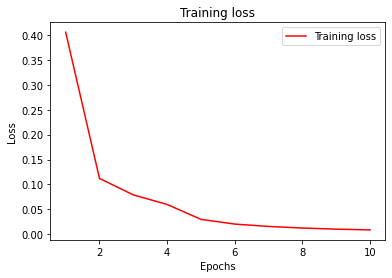

In [ ]:
#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, loss, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

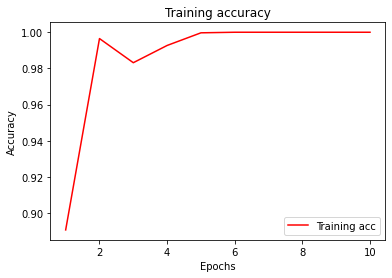

In [ ]:
#plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, acc, 'r', label='Training acc')
#plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
for i in range(2):
  Train_pred1 = model[0].predict(x_train)
  Train_pred2 = model[1].predict(x_train)

123/123 [==============================] - 3s 27ms/step


In [ ]:
print(Train_pred1)

[[0.9113043 ]
 [0.90823793]
 [0.01195483]
 ...
 [0.00940316]
 [0.75895876]
 [0.00891713]]


In [ ]:
len(Train_pred1)

3935

In [ ]:
print(Train_pred2)

[[0.98583984]
 [0.98331445]
 [0.0050908 ]
 ...
 [0.00477315]
 [0.8844749 ]
 [0.00431291]]


In [ ]:
for i in range(2):
  Test_pred1 = model[0].predict(x_test)
  Test_pred2 = model[1].predict(x_test)

31/31 [==============================] - 1s 28ms/step


In [ ]:
print(Test_pred1)

[[0.8177539 ]
 [0.00888899]
 [0.04541729]
 [0.00818035]
 [0.00395686]
 [0.00671379]
 [0.00708254]
 [0.00880519]
 [0.02620043]
 [0.00876139]
 [0.00458863]
 [0.01736368]
 [0.00811205]
 [0.00745465]
 [0.00417422]
 [0.01459903]
 [0.01046899]
 [0.06593704]
 [0.69665253]
 [0.00598163]
 [0.9511974 ]
 [0.12455182]
 [0.0105849 ]
 [0.95124793]
 [0.00733946]
 [0.04339739]
 [0.02630862]
 [0.00943349]
 [0.86270356]
 [0.00794575]
 [0.0086351 ]
 [0.01517567]
 [0.19098498]
 [0.00610494]
 [0.01173911]
 [0.31706753]
 [0.0077711 ]
 [0.02051052]
 [0.01334281]
 [0.02191559]
 [0.8991725 ]
 [0.12443486]
 [0.0118438 ]
 [0.00773302]
 [0.9506075 ]
 [0.00803683]
 [0.9345692 ]
 [0.9468392 ]
 [0.02091851]
 [0.01333654]
 [0.00441113]
 [0.00362049]
 [0.01591855]
 [0.8196969 ]
 [0.80588526]
 [0.03035117]
 [0.00661145]
 [0.00948608]
 [0.009316  ]
 [0.00508963]
 [0.01254557]
 [0.00594863]
 [0.9391054 ]
 [0.17413253]
 [0.00616368]
 [0.01552686]
 [0.00957622]
 [0.00961848]
 [0.01735385]
 [0.90836895]
 [0.9521236 ]
 [0.01

In [ ]:
len(Test_pred1)

984

In [ ]:
print(Test_pred2)

[[0.9815515 ]
 [0.00466536]
 [0.02678211]
 [0.00429671]
 [0.00427767]
 [0.00448957]
 [0.00413648]
 [0.00457498]
 [0.00644872]
 [0.00537176]
 [0.00438341]
 [0.00560795]
 [0.00417305]
 [0.00447034]
 [0.00410015]
 [0.00645574]
 [0.00477968]
 [0.02654932]
 [0.784448  ]
 [0.00404693]
 [0.9842515 ]
 [0.05216152]
 [0.00539486]
 [0.9818829 ]
 [0.00432889]
 [0.01494304]
 [0.00678621]
 [0.00463099]
 [0.97300315]
 [0.00452168]
 [0.00486765]
 [0.00595468]
 [0.02675132]
 [0.00456847]
 [0.00499675]
 [0.07564787]
 [0.00580928]
 [0.00685171]
 [0.00567815]
 [0.00577042]
 [0.9825663 ]
 [0.01719104]
 [0.00499098]
 [0.00446494]
 [0.977897  ]
 [0.0046012 ]
 [0.9847251 ]
 [0.98325694]
 [0.00630714]
 [0.00546965]
 [0.00418749]
 [0.00398587]
 [0.00546653]
 [0.9802783 ]
 [0.6444491 ]
 [0.00780161]
 [0.00420103]
 [0.00526054]
 [0.00500557]
 [0.00444334]
 [0.00532606]
 [0.00437265]
 [0.98521954]
 [0.02968495]
 [0.00447678]
 [0.00548254]
 [0.00461687]
 [0.00467084]
 [0.00563222]
 [0.9762893 ]
 [0.98793507]
 [0.00

In [ ]:
print(data['content'][2] ,Train_pred1[2],Train_pred2[2])

June 2015 I went on a small trip around Asia and I had 5 flight with AirAsia: HK-KL, KL-Jakarta, Jakarta-Singapore, Singapore-Bangkok, Bangkok-Xi'an. Beforehand, I read some reviews about AirAsia online and 99% of them were really bad. Everyone was complaining about delayed/changed flight and poor customer service. After all I read, I expected awful flight but in fact everything went smoothly. All flight were on time (except one - 2 hour delay) and customer service was good. And yes, you have to pay for drinks and food on board but come on, I got 5 flight around Asia for less than £200 altogether. I would fly with AirAsia again! [0.01195483] [0.0050908]


In [ ]:
print(data['content'][4969] ,Test_pred1[983],Test_pred2[983] )

Never heard of this airline until I flew in July on Embraer 190 from Tianjin to Ningbo but impressed by service standards. At the airport the check in and boarding was quick and efficient and FA's were very attentive. Okay their English language skills need improving but never seen such an efficient and smiling set of FA's. Seats comfortable for this quite short trip meal was also good - lack of newspapers though. Will fly them again in September and woulkd have no doubts about recommending them to others as a must-try airline. [0.01174848] [0.00478893]
